In [ ]:
[Github](

# Activity 3.3 K Nearest Neighbors

Objective(s):

This activity aims to perform classification using K Nearest Neighbors

Intended Learning Outcomes (ILOs):
* Build the model using K Nearest Neighbors.
* Evaluate the performance of the model.
* Choose the best k-value.


Resources:
* Jupyter Notebook
* Classified data

Procedure:

Import the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Load the data. Set index_col=0 to use the first column as the index.

In [4]:
df = pd.read_csv("Classified Data",index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
print(df.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')



Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Split the data into a training set and a testing set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

Buid a model using k=1

Remember that wwe are building a model to predict whether someone will TARGET CLASS or not.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

Evaluate the KNN model.

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [20]:
print(confusion_matrix(y_test,pred))

[[129  14]
 [ 12 145]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       143
           1       0.91      0.92      0.92       157

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Choose a K value. Create a method to pick a good value of K.

In [22]:
error_rate = []


for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Create a visualization to compare the error rate and k value

Text(0, 0.5, 'Error Rate')

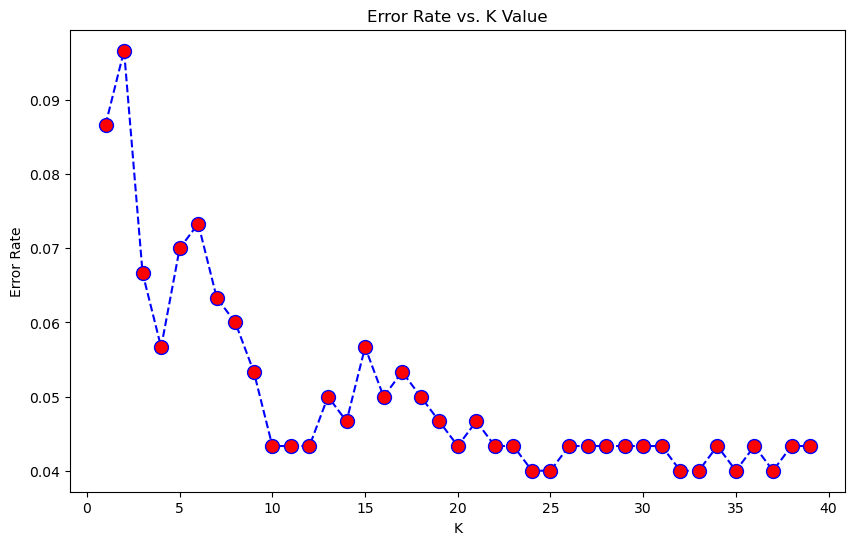

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Interpret the result of the graph

*The graph shows that as K increases, the error rate decreases. This would imply that evaluating more data points or "neighbors" would lead to a more accurate classification*

Compare the classification report of K=1 and K=23

In [24]:
# K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[129  14]
 [ 12 145]]


              precision    recall  f1-score   support

           0       0.91      0.90      0.91       143
           1       0.91      0.92      0.92       157

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [25]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[132  11]
 [  2 155]]


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       143
           1       0.93      0.99      0.96       157

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Interpret the result of the graph.

*The classification report of K=1 and K=23 proves the inference earlier that as K increases, the accuracy increases too. Furthermore, K=23 is also more precise and has a higher recall*

Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above.

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9333333333333333


Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

In [27]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.94


Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`?

In [28]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [29]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

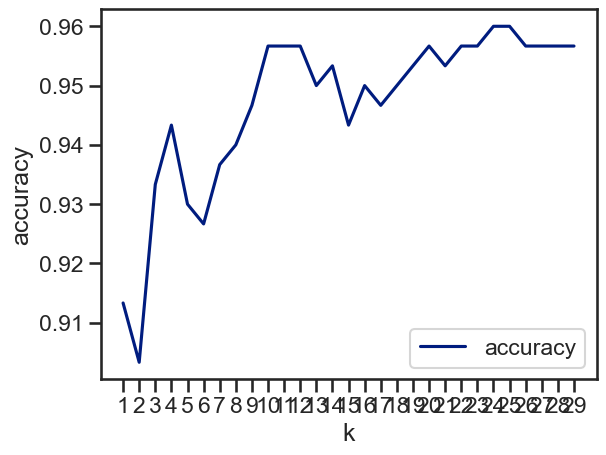

In [30]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 30));

Supplementary Activities:

* Choose your own dataset


* Import the dataset


* Determine the number of datapoints, columns and data types


* Remove unneccesary columns


* Do data cleaning such as removing empty values(NaN), replacing missing data .

* Standardize the variables.


* Perform descriptive statistics such as mean, median and mode


* Perform data visualization


* Build the model using K Nearest Neighbor. Use k value from 1 to 50.


* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score


* Compare the model using their accuracy report.


* Create a graph to compare the accuracy based from each k values.

Conclusion

Type your conclusion here